In [7]:
import seaborn as sns

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
df=sns.load_dataset('flights')

<Axes: xlabel='year', ylabel='passengers'>

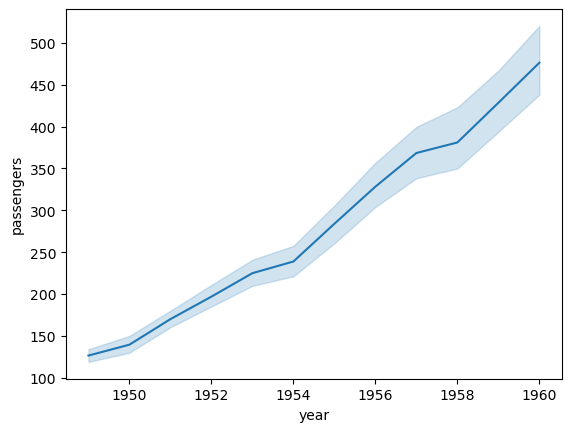

In [20]:
sns.lineplot(x='year',y='passengers',data=df)

In [16]:
df.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [ ]:
# Feature Scaling

In [148]:

df= pd.read_excel('feature_scaling_data.xlsx')

In [150]:
df["Reg'Id"]=df["Reg'Id"].astype(object)

In [152]:
df.head(5)


,Reg'Id,Name,Salary,Increment,Bonus,Promotion
0,1,Ali,183813,15363,65183,Yes
1,2,Shaheer,193193,13062,96764,Yes
2,3,Shameer,193250,19625,76692,No
3,4,Danish,127604,10386,95746,Yes
4,5,Well Wisher,141929,19854,91023,No


In [154]:
df['Salary'].describe()

count        15.000000
mean     145517.866667
std       33394.234983
min      101082.000000
25%      118020.000000
50%      137248.000000
75%      177367.500000
max      193250.000000
Name: Salary, dtype: float64

In [156]:
df.describe()

,Salary,Increment,Bonus
count,15.000000,15.00000,15.00000
mean,145517.866667,11348.20000,80054.20000
std,33394.234983,5068.74486,13071.22934
min,101082.000000,2629.00000,58390.00000
25%,118020.000000,7808.50000,67599.50000
50%,137248.000000,11536.00000,83424.00000
75%,177367.500000,14212.50000,89931.00000
max,193250.000000,19854.00000,96764.00000


<Axes: xlabel='Salary', ylabel='Density'>

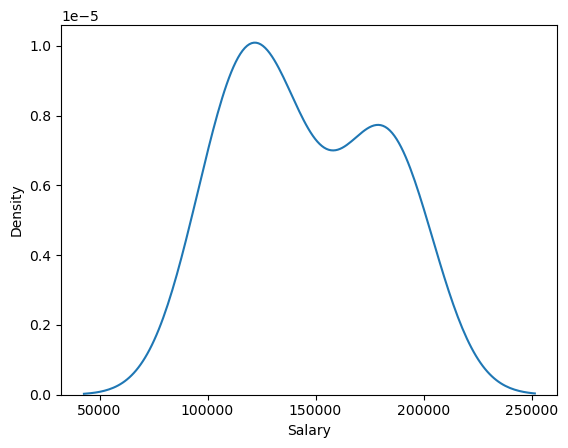

In [158]:
sns.kdeplot(df['Salary'])

In [160]:
from sklearn.preprocessing import StandardScaler

In [162]:
sc=StandardScaler()

In [166]:
sc.fit(df[['Salary','Bonus','Increment']])

StandardScaler()

In [168]:
df_std =sc.transform(df[['Salary','Bonus','Increment']])

In [170]:
df_std=pd.DataFrame(df_std,columns=['Salary_Std','Increment_std','Bonus_std'])

In [172]:
df_n = pd.concat([df_std,df[["Reg'Id", 'Name', 'Salary', 'Increment', 'Bonus', 'Promotion']].reset_index(drop=True)],axis=1)

In [180]:
df_n.head()

,Salary_Std,Increment_std,Bonus_std,Reg'Id,Name,Salary,Increment,Bonus,Promotion
0,1.187008,-1.177636,0.819870,1,Ali,183813,15363,65183,Yes
1,1.477754,1.323233,0.349978,2,Shaheer,193193,13062,96764,Yes
2,1.479520,-0.266249,1.690222,3,Shameer,193250,19625,76692,No
3,-0.555264,1.242619,-0.196493,4,Danish,127604,10386,95746,Yes
4,-0.111242,0.868609,1.736986,5,Well Wisher,141929,19854,91023,No


In [186]:
df_n=df_n[["Reg'Id", 'Name','Salary_Std', 'Increment_std', 'Bonus_std']]

In [188]:
df_n.columns

Index(['Reg'Id', 'Name', 'Salary_Std', 'Increment_std', 'Bonus_std'], dtype='object')

In [192]:
df_n=df_n.rename(columns={'Salary_Std':'Salary','Increment_std':'Increment','Bonus_std':'Bonus'})

In [194]:
df_n.head()

,Reg'Id,Name,Salary,Increment,Bonus
0,1,Ali,1.187008,-1.177636,0.819870
1,2,Shaheer,1.477754,1.323233,0.349978
2,3,Shameer,1.479520,-0.266249,1.690222
3,4,Danish,-0.555264,1.242619,-0.196493
4,5,Well Wisher,-0.111242,0.868609,1.736986


In [196]:
df_n

,Reg'Id,Name,Salary,Increment,Bonus
0,1,Ali,1.187008,-1.177636,0.819870
1,2,Shaheer,1.477754,1.323233,0.349978
2,3,Shameer,1.479520,-0.266249,1.690222
3,4,Danish,-0.555264,1.242619,-0.196493
4,5,Well Wisher,-0.111242,0.868609,1.736986
5,6,Umar,-0.256335,1.182198,-0.746436
6,7,Muhammad,0.837928,-0.114444,0.256245
7,8,Ammar,-1.133376,0.266851,-1.306385
8,9,Qusai,1.136515,0.399018,-0.699263
9,10,Faiz,-0.521323,-1.273613,-1.780565


In [132]:
df

,Reg'Id,Name,Salary,Increment,Bonus,Promotion
0,1,Ali,183813,15363,65183,Yes
1,2,Shaheer,193193,13062,96764,Yes
2,3,Shameer,193250,19625,76692,No
3,4,Danish,127604,10386,95746,Yes
4,5,Well Wisher,141929,19854,91023,No
5,6,Umar,137248,7693,94983,Yes
6,7,Muhammad,172551,12603,78609,Yes
7,8,Ammar,108953,4951,83424,No
8,9,Qusai,182184,7924,85093,Yes
9,10,Faiz,128699,2629,63971,No


In [198]:
np.round(df.describe(),1)

,Salary,Increment,Bonus
count,15.0,15.0,15.0
mean,145517.9,11348.2,80054.2
std,33394.2,5068.7,13071.2
min,101082.0,2629.0,58390.0
25%,118020.0,7808.5,67599.5
50%,137248.0,11536.0,83424.0
75%,177367.5,14212.5,89931.0
max,193250.0,19854.0,96764.0


In [200]:
np.round(df_n.describe(),1)

,Salary,Increment,Bonus
count,15.0,15.0,15.0
mean,-0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-1.4,-1.7,-1.8
25%,-0.9,-1.0,-0.7
50%,-0.3,0.3,0.0
75%,1.0,0.8,0.6
max,1.5,1.3,1.7


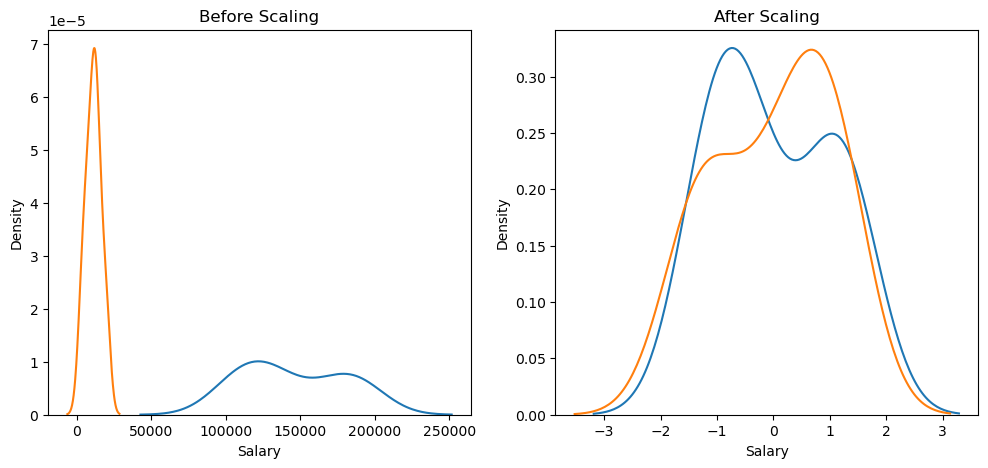

In [220]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')

sns.kdeplot(df['Salary'],ax=ax1)
sns.kdeplot(df['Increment'],ax=ax1)

sns.kdeplot(df_n['Salary'],ax=ax2)
sns.kdeplot(df_n['Increment'],ax=ax2)



plt.show()

In [9]:
df=pd.read_excel('feature_scaling_data.xlsx')

In [22]:
df.sample(3)

,Reg'Id,Name,Salary,Increment,Bonus,Promotion
8,9,Qusai,182184,7924,85093,Yes
11,12,Abrar,107543,11536,58390,No
0,1,Ali,183813,15363,65183,Yes


In [26]:
df["Reg'Id"]=df["Reg'Id"].astype(object)

In [28]:
df.describe()

,Salary,Increment,Bonus
count,15.000000,15.00000,15.00000
mean,145517.866667,11348.20000,80054.20000
std,33394.234983,5068.74486,13071.22934
min,101082.000000,2629.00000,58390.00000
25%,118020.000000,7808.50000,67599.50000
50%,137248.000000,11536.00000,83424.00000
75%,177367.500000,14212.50000,89931.00000
max,193250.000000,19854.00000,96764.00000


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mx=MinMaxScaler()

In [38]:
mx.fit(df[['Salary', 'Increment', 'Bonus']])

MinMaxScaler()

In [42]:
df_mx =mx.transform(df[['Salary', 'Increment', 'Bonus']])

In [50]:
df_mx=pd.DataFrame(df_mx,columns=[['Salary_mx', 'Increment_mx', 'Bonus_mx']])

In [56]:
df_mx.head()

,Salary_mx,Increment_mx,Bonus_mx
0,0.897611,0.739274,0.177021
1,0.999382,0.605689,1.000000
2,1.000000,0.986705,0.476938
3,0.287757,0.450334,0.973472
4,0.443180,1.000000,0.850393


In [62]:
df_ne = pd.concat([df_mx,df[["Reg'Id", 'Name','Promotion']].reset_index(drop=True)],axis=1)

In [64]:
df_ne.columns

Index([('Salary_mx',), ('Increment_mx',), ('Bonus_mx',), 'Reg'Id', 'Name',
       'Promotion'],
      dtype='object')

In [70]:
df_ne.head()

,"(Salary_mx,)","(Increment_mx,)","(Bonus_mx,)",Reg'Id,Name,Promotion
0,0.897611,0.739274,0.177021,1,Ali,Yes
1,0.999382,0.605689,1.000000,2,Shaheer,Yes
2,1.000000,0.986705,0.476938,3,Shameer,No
3,0.287757,0.450334,0.973472,4,Danish,Yes
4,0.443180,1.000000,0.850393,5,Well Wisher,No


In [74]:
np.round(df.describe(),1)


,Salary,Increment,Bonus
count,15.0,15.0,15.0
mean,145517.9,11348.2,80054.2
std,33394.2,5068.7,13071.2
min,101082.0,2629.0,58390.0
25%,118020.0,7808.5,67599.5
50%,137248.0,11536.0,83424.0
75%,177367.5,14212.5,89931.0
max,193250.0,19854.0,96764.0


In [78]:
np.round(df_mx.describe(),1)

,Salary_mx,Increment_mx,Bonus_mx
count,15.0,15.0,15.0
mean,0.5,0.5,0.6
std,0.4,0.3,0.3
min,0.0,0.0,0.0
25%,0.2,0.3,0.2
50%,0.4,0.5,0.7
75%,0.8,0.7,0.8
max,1.0,1.0,1.0


KeyError: '   Salary_mx,'

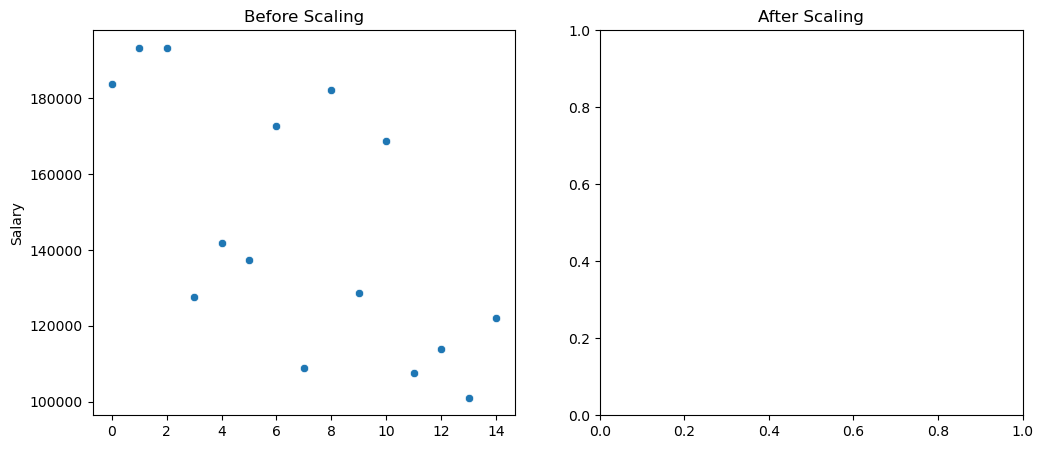

In [96]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')

sns.scatterplot(df['Salary'],ax=ax1)

sns.scatterplot(df_mx['   Salary_mx,'],ax=ax2)



plt.show()

In [92]:
df_mx.columns

MultiIndex([(   'Salary_mx',),
            ('Increment_mx',),
            (    'Bonus_mx',)],
           )

In [125]:
df=pd.read_excel('ordinal_data.xlsx')

In [127]:
df.head()

,Reg'Id,Name,Education,Promotion
0,1,Ali,Bachelors,Yes
1,2,Shaheer,Masters,Yes
2,3,Shameer,PHD,No
3,4,Danish,PHD,Yes
4,5,Well Wisher,Masters,No


In [129]:
from sklearn.preprocessing import OrdinalEncoder

In [131]:
oe = OrdinalEncoder(categories=[['Bachelors','Masters','PHD']])

In [133]:
df['Education'].isnull().sum()

0

In [139]:
df_oe= oe.fit_transform(df[['Education']])

In [143]:
df_oe=pd.DataFrame(df_oe,columns=['Education'])

In [147]:
df_oe

,Education
0,0.0
1,1.0
2,2.0
3,2.0
4,1.0
5,0.0
6,0.0
7,1.0
8,2.0
9,2.0


In [151]:
df.groupby('Education').size()

Education
Bachelors    6
Masters      4
PHD          4
dtype: int64

In [155]:
df_oe.groupby('Education').size()

Education
0.0    6
1.0    4
2.0    4
dtype: int64

In [158]:
df.head()

,Reg'Id,Name,Education,Promotion
0,1,Ali,Bachelors,Yes
1,2,Shaheer,Masters,Yes
2,3,Shameer,PHD,No
3,4,Danish,PHD,Yes
4,5,Well Wisher,Masters,No


In [162]:
from sklearn.preprocessing import LabelEncoder

In [168]:
le=LabelEncoder()

In [172]:
df_pom = le.fit_transform(df[['Promotion']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
df_pom=pd.DataFrame(df_pom,columns=['Promotion'])

In [176]:
df_pom

,Promotion
0,1
1,1
2,0
3,1
4,0
5,1
6,1
7,0
8,1
9,0


In [ ]:
df['Promot]